In [2]:
%matplotlib inline
import pandas as pd

In [3]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,The Spider and the Fly,1949
3,Country,2000
4,The Golden Note,2017


In [4]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [5]:
release_dates = pd.read_csv('data/release_dates.csv', 
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


### How many movies are listed in the titles dataframe?

In [6]:
titles.count()

title    244914
year     244914
dtype: int64

### What is the name and year of the very first movie ever made?


In [10]:
titles.sort_values(by=['year'], ascending=True).head(1)

,title,year
187327,Miss Jerry,1894


### How many movies have the title "Hamlet"?

In [15]:
titles[titles['title'] == 'Hamlet'].count()

title    20
year     20
dtype: int64

### When was the first movie titled "Hamlet" made?

In [18]:
titles[titles['title'] == 'Hamlet'].sort_values(by=['year'], ascending=True).head(1)

,title,year
49308,Hamlet,1910


### List all of the "Treasure Island" movies from earliest to most recent.

In [27]:
titles[titles['title'] == 'Treasure Island'].sort_values(by=['year'], ascending=True)

,title,year
217091,Treasure Island,1918
54095,Treasure Island,1920
201357,Treasure Island,1934
102046,Treasure Island,1950
81338,Treasure Island,1972
117328,Treasure Island,1973
216419,Treasure Island,1985
189010,Treasure Island,1999


### How many movies were made in the year 1950?

In [29]:
titles[titles['year'] == 1950].count()

title    1113
year     1113
dtype: int64

### What are the names of the movies made through 1906?

In [34]:
titles[titles['year'] == 1906]

,title,year
29753,The Joe Gans-Battling Nelson Fight,1906
153052,Lika mot lika,1906
175231,The Story of the Kelly Gang,1906
203902,Highlights from The Mikado,1906
225531,Impersonation of Nelson-McGovern Fight,1906


### In what years has a movie titled "Batman" been released?

In [35]:
titles[titles['title'] == 'Batman']

,title,year
59052,Batman,1989
78565,Batman,1943


### How many roles were there in the movie "Inception"?

In [103]:
len(cast[(cast.title == 'Inception')].groupby('character').nunique())

56

### How many roles in the movie "Inception" are NOT ranked by an "n" value?

In [55]:
cast[(cast.title == 'Inception') & cast.n.isnull()].count()

title        27
year         27
name         27
type         27
character    27
n             0
dtype: int64

### But how many roles in the movie "Inception" did receive an "n" value?

In [96]:
len(cast[(cast.title == 'Inception') & cast.n.notnull()])

51

### Now display the entire cast, in "n"-order, of the 2007 version of "Sleuth".

In [104]:
cast[(cast.title == 'Sleuth')&(cast.year == 2007)].sort_values(by=['n'], ascending=False)

,title,year,name,type,character,n
1805907,Sleuth,2007,Harold Pinter,actor,Man on T.V.,3.0
1293634,Sleuth,2007,Jude Law,actor,Milo,2.0
326774,Sleuth,2007,Michael Caine,actor,Andrew,1.0
260242,Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
373877,Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
2724552,Sleuth,2007,Eve (II) Channing,actress,Marguerite Wyke,NaN
3370424,Sleuth,2007,Carmel O'Sullivan,actress,Maggie,NaN


### How many "Hamlet" roles have been listed in all film credits through history?

In [95]:
len(cast[cast.character == 'Hamlet'])

96

### How many people have played an "Ophelia"?

In [101]:
len(cast[cast.title == 'Ophelia'])

20

### How many roles has Sidney Poitier played throughout his career?

In [102]:
len(cast[cast.name == 'Sidney Portier'])

0

### What are the ten most common movie names of all time?


In [81]:
titles['title'].value_counts().head(10)

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
Temptation              12
The Outsider            12
The Three Musketeers    11
Freedom                 11
Othello                 11
Honeymoon               11
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [86]:
titles[(titles.year <= 1939) & (titles.year >= 1930)]['year'].value_counts().head(3)

1937    1224
1936    1169
1938    1163
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

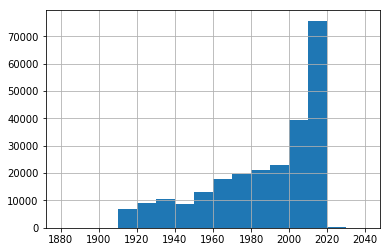

In [112]:
a = range(1880, 2050, 10)
titles.year.hist(bins=a)

### Which actors or actresses appeared in the most movies in the year 1945?

In [123]:
a=cast[(cast.year == 1945)&(cast.type == 'actor')]['name'].value_counts().head(3)
print(a)
b = cast[(cast.year == 1945)&(cast.type == 'actress')]['name'].value_counts().head(3)
print(b)

Emmett Vogan       39
Sam (II) Harris    33
Harold Miller      29
Name: name, dtype: int64
Bess Flowers     29
Beverly Reedy    20
Melva Anstead    17
Name: name, dtype: int64


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

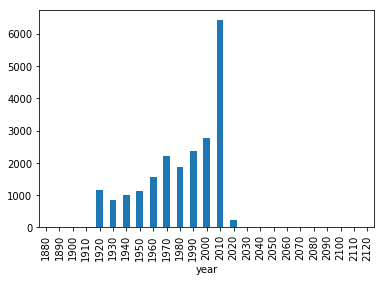

In [38]:
decades = range(1880, 2130, 10)
titles['year'] = pd.Categorical(titles['year'], categories=decades)
a = titles.groupby('year').count().plot(kind = 'bar', legend = False)

Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.


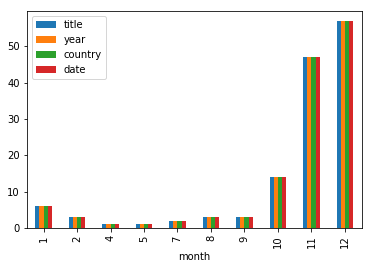

In [37]:
release_dates['month']=release_dates['date'].dt.month
release_dates[(release_dates.title.str.contains('Christmas'))&(release_dates.country == 'USA')].groupby('month').count().plot(kind='bar', legend = False)
